In [48]:
import pandas as pd    # for data analysis
import numpy as np     # a libraru for array functions
import matplotlib.pyplot as plt # for making plots
import seaborn as sns  # a plotting package built on top of pandas

#import machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

#import feature importance modules
!pip install yellowbrick #uncomment if yellowbrick module not installed
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier


import pickle

In [2]:
data = pd.read_csv('data/xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
data.rename(columns={'NationalITy':'Nationality',
'VisITedResources':'VisitedResources',
'ParentschoolSatisfaction':'ParentSchoolSatisfaction',
'raisedhands':'raisedHands'}, inplace=True) 

In [5]:
print(list(data.columns), sep=' ')

['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [6]:
data.drop(columns=['PlaceofBirth','Nationality','SectionID','Semester','Relation','ParentAnsweringSurvey','ParentSchoolSatisfaction'], inplace=True)

In [7]:
data.head()

,gender,StageID,GradeID,Topic,raisedHands,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,IT,15,16,2,20,Under-7,M
1,M,lowerlevel,G-04,IT,20,20,3,25,Under-7,M
2,M,lowerlevel,G-04,IT,10,7,0,30,Above-7,L
3,M,lowerlevel,G-04,IT,30,25,5,35,Above-7,L
4,M,lowerlevel,G-04,IT,40,50,12,50,Above-7,M


In [51]:
gender_map = {'M':1, 
              'F':2}

StageID_map = {'HighSchool':1, 
               'lowerlevel':2, 
               'MiddleSchool':3}

GradeID_map =   {'G-01':1,
                 'G-02':2,
                 'G-03':3,
                 'G-04':4,
                 'G-05':5,
                 'G-06':6,
                 'G-07':7,
                 'G-08':8,
                 'G-09':9,
                 'G-10':10,
                 'G-11':11,
                 'G-12':12}



Topic_map  =    {'Biology' : 1,
                 'Geology' : 2,
                 'Quran' : 3,
                 'Science' : 4,
                 'Spanish' : 5,
                 'IT' : 6,
                 'French' : 7,
                 'English' :8,
                 'Arabic' :9,
                 'Chemistry' :10,
                 'Math' :11,
                 'History' : 12}



StudentAbsenceDays_map = {'Under-7':0,
                          'Above-7':1}

Class_map = {'H':10,
             'M':5,
             'L':2}

In [52]:
mod_df = data
mod_df.gender                 = mod_df.gender.map(gender_map)
mod_df.StageID                = mod_df.StageID.map(StageID_map)
mod_df.GradeID                = mod_df.GradeID.map(GradeID_map)
mod_df.Topic                  = mod_df.Topic.map(Topic_map)
mod_df.StudentAbsenceDays     = mod_df.StudentAbsenceDays.map(StudentAbsenceDays_map)
mod_df.Class                  = mod_df.Class.map(Class_map)

In [53]:
mod_df

,gender,StageID,GradeID,Topic,raisedHands,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,1,2,4,6,15,16,2,20,0,5
1,1,2,4,6,20,20,3,25,0,5
2,1,2,4,6,10,7,0,30,1,2
3,1,2,4,6,30,25,5,35,1,2
4,1,2,4,6,40,50,12,50,1,5
...,...,...,...,...,...,...,...,...,...,...
475,2,3,8,10,5,4,5,8,1,2
476,2,3,8,2,50,77,14,28,0,5
477,2,3,8,2,55,74,25,29,0,5
478,2,3,8,12,30,17,14,57,1,2


In [54]:
X = data.drop(columns='Class')
y = data['Class']

In [55]:
X.head()

,gender,StageID,GradeID,Topic,raisedHands,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,1,2,4,6,15,16,2,20,0
1,1,2,4,6,20,20,3,25,0
2,1,2,4,6,10,7,0,30,1
3,1,2,4,6,30,25,5,35,1
4,1,2,4,6,40,50,12,50,1


In [56]:
print(list(X.columns), sep=' ')

['gender', 'StageID', 'GradeID', 'Topic', 'raisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']


In [11]:
X = pd.get_dummies(X)

In [57]:
shape = X.shape
print(f'Number of rows: {shape[0]}\nNumber of columns: {shape[1]}')

Number of rows: 480
Number of columns: 9


In [58]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
model = MLPClassifier(random_state=42, max_iter=1000)


In [60]:
model.fit(train_X, train_y)

MLPClassifier(max_iter=1000, random_state=42)

In [61]:
pred_y = model.predict(test_X)

In [62]:
pred_y

array([ 2,  2, 10, 10, 10,  5,  2,  2,  5,  5, 10,  5,  5,  5,  5, 10,  2,
        5,  2,  5,  5, 10,  5,  5,  2,  2, 10,  5,  5,  5,  5,  5,  2, 10,
        5,  5,  5,  5, 10,  5,  5,  5,  2,  5,  5,  2,  5,  5, 10,  5,  5,
       10,  2,  5,  5,  2,  2, 10, 10,  2,  5,  5,  2, 10,  5,  5,  2,  5,
        2,  5,  5, 10,  5,  5,  5,  5,  5,  2,  2,  5,  5,  5,  5, 10,  5,
        5,  5,  2,  2,  5,  5,  5,  5,  5,  2, 10,  2,  5, 10,  2,  5,  2,
        2,  5,  5, 10,  5,  2,  5,  2,  2,  5,  5,  5,  5,  2, 10,  5,  5,
        2])

In [63]:
cm = confusion_matrix(test_y, pred_y)
cm

array([[26,  8,  0],
       [ 6, 45,  7],
       [ 0, 15, 13]])

<AxesSubplot:>

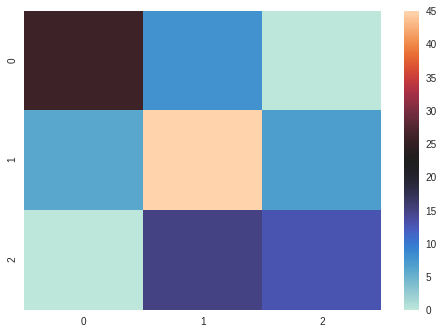

In [64]:
sns.heatmap(cm, cmap='icefire')

In [65]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           2       0.81      0.76      0.79        34
           5       0.66      0.78      0.71        58
          10       0.65      0.46      0.54        28

    accuracy                           0.70       120
   macro avg       0.71      0.67      0.68       120
weighted avg       0.70      0.70      0.69       120



In [66]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [67]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test_X)
print(result)

[ 2  2 10 10 10  5  2  2  5  5 10  5  5  5  5 10  2  5  2  5  5 10  5  5
  2  2 10  5  5  5  5  5  2 10  5  5  5  5 10  5  5  5  2  5  5  2  5  5
 10  5  5 10  2  5  5  2  2 10 10  2  5  5  2 10  5  5  2  5  2  5  5 10
  5  5  5  5  5  2  2  5  5  5  5 10  5  5  5  2  2  5  5  5  5  5  2 10
  2  5 10  2  5  2  2  5  5 10  5  2  5  2  2  5  5  5  5  2 10  5  5  2]


In [73]:
test_x = np.array([1,1,1,1,15,16,2,20,1]).reshape(1, -1)
result = loaded_model.predict(test_x)
print(result)

[2]


In [74]:
X

,gender,StageID,GradeID,Topic,raisedHands,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,1,2,4,6,15,16,2,20,0
1,1,2,4,6,20,20,3,25,0
2,1,2,4,6,10,7,0,30,1
3,1,2,4,6,30,25,5,35,1
4,1,2,4,6,40,50,12,50,1
...,...,...,...,...,...,...,...,...,...
475,2,3,8,10,5,4,5,8,1
476,2,3,8,2,50,77,14,28,0
477,2,3,8,2,55,74,25,29,0
478,2,3,8,12,30,17,14,57,1


In [ ]:
import csv

with open("data/xAPI-Edu-Data.csv", 'r') as input, open('temp.csv', 'w') as output:
    reader = csv.reader(input, delimiter = ',')
    writer = csv.writer(output, delimiter = ',')

    all = []
    row = next(reader)
    row.insert(0, 'ID')
    all.append(row)
    count = 0
    for row in reader:
        count += 1
        row.insert(0, count)
        all.append(row)
    writer.writerows(all)

In [43]:
df = pd.read_csv('temp.csv')
df.head()

,ID,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,5,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [44]:
df.rename(columns={'NationalITy':'Nationality',
'VisITedResources':'VisitedResources',
'ParentschoolSatisfaction':'ParentSchoolSatisfaction',
'raisedhands':'raisedHands'}, inplace=True) 

In [45]:
df.drop(data.columns[[0]],axis = 1)

,ID,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,2,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,3,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,4,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,5,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,477,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,478,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,479,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [46]:
df.drop(columns=['PlaceofBirth','Nationality','SectionID','Semester','Relation','ParentAnsweringSurvey','ParentSchoolSatisfaction'], inplace=True)

In [47]:
df.head()

,ID,gender,StageID,GradeID,Topic,raisedHands,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,1,M,lowerlevel,G-04,IT,15,16,2,20,Under-7,M
1,2,M,lowerlevel,G-04,IT,20,20,3,25,Under-7,M
2,3,M,lowerlevel,G-04,IT,10,7,0,30,Above-7,L
3,4,M,lowerlevel,G-04,IT,30,25,5,35,Above-7,L
4,5,M,lowerlevel,G-04,IT,40,50,12,50,Above-7,M


In [ ]:
data.to_csv('data/mongo_input.csv')